In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from glob import glob

from datetime import datetime
from pathlib import Path

import gdown
import copernicusmarine

import roms_tools as rt
import config

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [3]:
clobber = False # not implemented here

grid_name = "wio-toy"

start_time = datetime(2012, 1, 1)
end_time = datetime(2012, 2, 1)

glorys_path = config.source_data / f"GLORYS_{grid_name}_{start_time.strftime("%Y-%m-%d")}-{end_time.strftime("%Y-%m-%d")}.nc"
bgc_forcing_path = config.source_data / "BGCdataset.nc"

In [4]:
input_data = config.input_data / grid_name
input_data.mkdir(exist_ok=True)

In [5]:
files_created = [  
    "roms_grd",
    "roms_ic",
    "roms_bry",
    "roms_rivers",
    "roms_frc",
    "roms_bry",
    "roms_cdr",
    "roms_frc_bgc",    
    "roms_bry_bgc_clim",
    "roms_frc_bgc_clim",
]

for f in files_created:
    fs = glob(str(input_data / f"{f}*.nc"))
    for ff in fs:
        try:
            os.remove(ff)
            print(f"Removed {f}")
        except PermissionError:
            print(f"Permission denied: {f}")

Removed roms_grd
Removed roms_grd
Removed roms_grd
Removed roms_grd
Removed roms_grd
Removed roms_grd
Removed roms_grd
Removed roms_grd
Removed roms_grd
Removed roms_grd
Removed roms_grd
Removed roms_ic
Removed roms_ic
Removed roms_ic
Removed roms_ic
Removed roms_ic
Removed roms_ic
Removed roms_ic
Removed roms_ic
Removed roms_ic
Removed roms_ic
Removed roms_ic
Removed roms_bry
Removed roms_bry
Removed roms_bry
Removed roms_rivers
Removed roms_frc
Removed roms_frc
Removed roms_frc
Removed roms_cdr


2025-11-12 00:28:57 - INFO - Writing the following NetCDF files:
/Users/mclong/data/input_data/wio-toy/roms_grd.nc


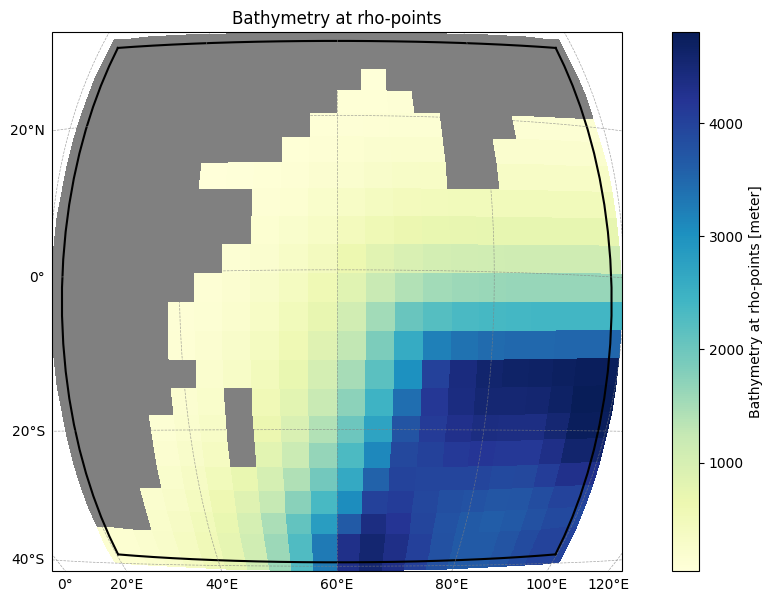

In [6]:
grid_yaml = config.blueprints / (grid_name + ".yaml")
grid = rt.Grid.from_yaml(grid_yaml, verbose=False)

grid.save(input_data / "roms_grd.nc")

grid.plot()

In [7]:
%%time
initial_conditions = rt.InitialConditions(
    grid=grid,
    ini_time=start_time,
    source={"name": "GLORYS", "path": glorys_path},
    bgc_source={
        "name": "UNIFIED",
        "path": bgc_forcing_path,
        "climatology": True,
    },
    use_dask=True
)

initial_conditions.save(input_data / "roms_ic.nc")

initial_conditions.ds

2025-11-12 00:28:57 - INFO - Sea surface height will NOT be used to adjust depth coordinates.
2025-11-12 00:29:02 - INFO - Writing the following NetCDF files:
/Users/mclong/data/input_data/wio-toy/roms_ic.nc


[########################################] | 100% Completed | 24.32 ss
CPU times: user 34 s, sys: 9.4 s, total: 43.4 s
Wall time: 29.8 s


<xarray.Dataset> Size: 722kB
Dimensions:      (ocean_time: 1, s_rho: 10, eta_rho: 22, xi_rho: 22, xi_u: 21,
                  eta_v: 21, s_w: 11)
Coordinates:
    abs_time     (ocean_time) datetime64[ns] 8B 2012-01-01
  * ocean_time   (ocean_time) float64 8B 3.787e+08
Dimensions without coordinates: s_rho, eta_rho, xi_rho, xi_u, eta_v, s_w
Data variables: (12/42)
    temp         (ocean_time, s_rho, eta_rho, xi_rho) float32 19kB dask.array<chunksize=(1, 10, 22, 22), meta=np.ndarray>
    salt         (ocean_time, s_rho, eta_rho, xi_rho) float32 19kB dask.array<chunksize=(1, 10, 22, 22), meta=np.ndarray>
    u            (ocean_time, s_rho, eta_rho, xi_u) float32 18kB dask.array<chunksize=(1, 10, 22, 21), meta=np.ndarray>
    v            (ocean_time, s_rho, eta_v, xi_rho) float32 18kB dask.array<chunksize=(1, 10, 21, 22), meta=np.ndarray>
    zeta         (ocean_time, eta_rho, xi_rho) float32 2kB 0.8533 ... 0.4466
    ubar         (ocean_time, eta_rho, xi_u) float32 2kB dask.array<chunksize=(1, 22, 21), meta=np.ndarray>
    ...           ...
    Lig          (ocean_time, s_rho, eta_rho, xi_rho) float32 19kB dask.array<chunksize=(1, 10, 22, 22), meta=np.ndarray>
    DIC_ALT_CO2  (ocean_time, s_rho, eta_rho, xi_rho) float32 19kB dask.array<chunksize=(1, 10, 22, 22), meta=np.ndarray>
    ALK_ALT_CO2  (ocean_time, s_rho, eta_rho, xi_rho) float32 19kB dask.array<chunksize=(1, 10, 22, 22), meta=np.ndarray>
    w            (ocean_time, s_w, eta_rho, xi_rho) float32 21kB 0.0 0.0 ... 0.0
    Cs_r         (s_rho) float32 40B -0.9114 -0.7004 ... -0.009273 -0.0009921
    Cs_w         (s_w) float32 44B -1.0 -0.809 -0.5929 ... -0.004025 0.0
Attributes:
    title:                                ROMS initial conditions file create...
    roms_tools_version:                   3.1.3.dev13+g2830da646
    ini_time:                             2012-01-01 00:00:00
    model_reference_date:                 2000-01-01 00:00:00
    adjust_depth_for_sea_surface_height:  False
    source:                               GLORYS
    bgc_source:                           UNIFIED
    theta_s:                              5.0
    theta_b:                              2.0
    hc:                                   300.0

[########################################] | 100% Completed | 6.32 sms


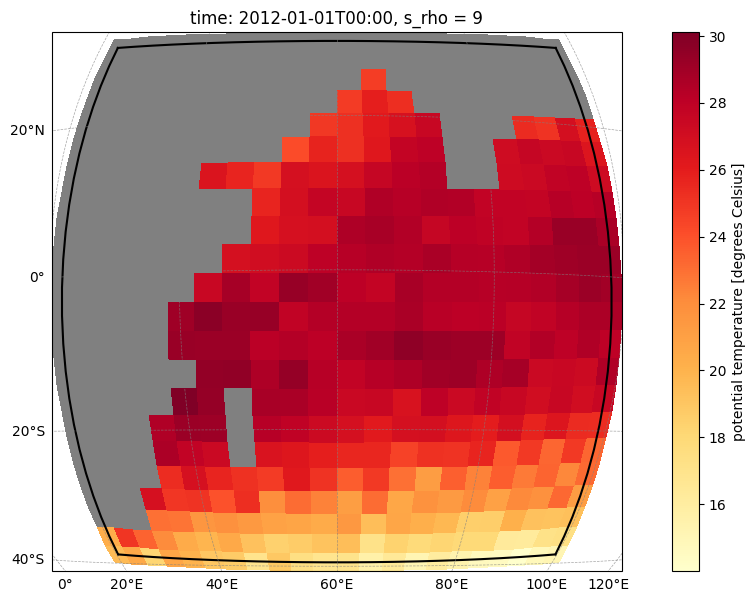

In [8]:
initial_conditions.plot("temp", s=-1)

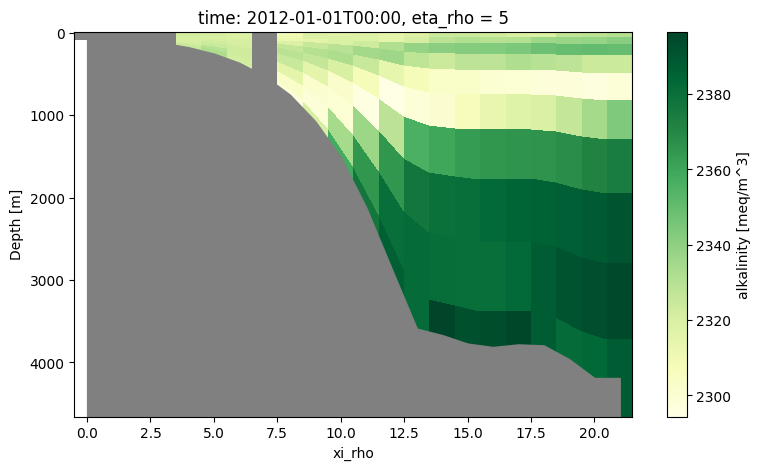

In [9]:
initial_conditions.plot("ALK", eta=5)

## Surface Forcing

### Meteorological forcing

In [10]:
%%time
surface_forcing = rt.SurfaceForcing(
    grid=grid,
    start_time=start_time,
    end_time=end_time,
    source={"name": "ERA5"},
    type="physics",
    use_dask=True
)

surface_forcing.save(input_data / "roms_frc.nc")

surface_forcing.ds

2025-11-12 00:29:33 - INFO - No path specified for ERA5 source; defaulting to ARCO ERA5 dataset on Google Cloud.
2025-11-12 00:31:00 - INFO - Data will be interpolated onto the fine grid. Remember to set `interp_frc = 0` in your `bulk_frc.opt` ROMS option file.
2025-11-12 00:31:14 - INFO - Writing the following NetCDF files:
/Users/mclong/data/input_data/wio-toy/roms_frc_201201.nc
/Users/mclong/data/input_data/wio-toy/roms_frc_201202.nc


[########################################] | 100% Completed | 205.54 s
[########################################] | 100% Completed | 532.35 ms
CPU times: user 4min 15s, sys: 43.3 s, total: 4min 58s
Wall time: 5min 20s


<xarray.Dataset> Size: 10MB
Dimensions:   (time: 745, eta_rho: 22, xi_rho: 22)
Coordinates:
    abs_time  (time) datetime64[ns] 6kB 2012-01-01 ... 2012-02-01
  * time      (time) float64 6kB 4.383e+03 4.383e+03 ... 4.414e+03 4.414e+03
Dimensions without coordinates: eta_rho, xi_rho
Data variables:
    uwnd      (time, eta_rho, xi_rho) float32 1MB dask.array<chunksize=(1, 22, 22), meta=np.ndarray>
    vwnd      (time, eta_rho, xi_rho) float32 1MB dask.array<chunksize=(1, 22, 22), meta=np.ndarray>
    swrad     (time, eta_rho, xi_rho) float32 1MB dask.array<chunksize=(1, 22, 22), meta=np.ndarray>
    lwrad     (time, eta_rho, xi_rho) float32 1MB dask.array<chunksize=(1, 22, 22), meta=np.ndarray>
    Tair      (time, eta_rho, xi_rho) float32 1MB dask.array<chunksize=(1, 22, 22), meta=np.ndarray>
    rain      (time, eta_rho, xi_rho) float32 1MB dask.array<chunksize=(1, 22, 22), meta=np.ndarray>
    qair      (time, eta_rho, xi_rho) float32 1MB dask.array<chunksize=(1, 22, 22), meta=np.ndarray>
Attributes:
    title:                 ROMS surface forcing file created by ROMS-Tools
    roms_tools_version:    3.1.3.dev13+g2830da646
    start_time:            2012-01-01 00:00:00
    end_time:              2012-02-01 00:00:00
    source:                ERA5
    correct_radiation:     True
    wind_dropoff:          False
    use_coarse_grid:       False
    model_reference_date:  2000-01-01 00:00:00
    type:                  physics

[########################################] | 100% Completed | 416.02 ms


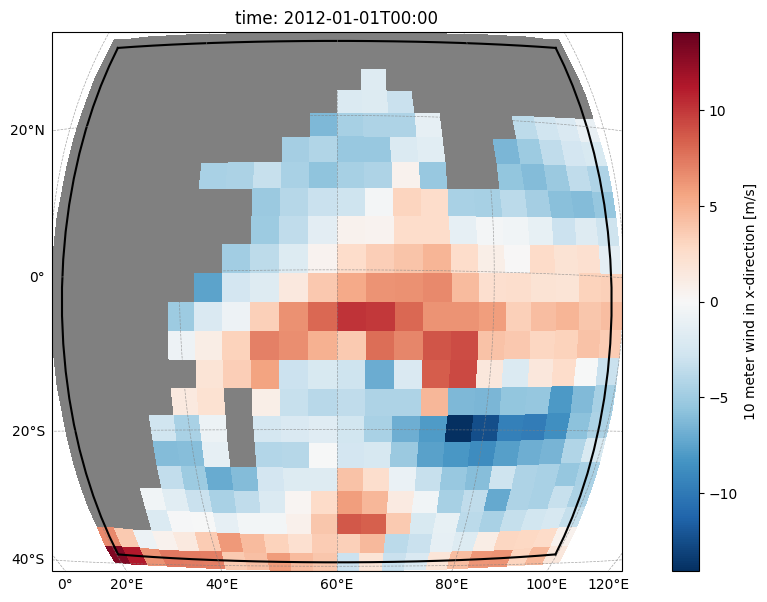

In [11]:
surface_forcing.plot("uwnd", time=0)

### Biogeochemistry 

In [12]:
%%time
bgc_surface_forcing =rt.SurfaceForcing(
    grid=grid,
    start_time=start_time,
    end_time=end_time,
    source={"name": "UNIFIED", "path": bgc_forcing_path, "climatology": True},
    type="bgc",
    use_dask=True
)

bgc_surface_forcing.save(input_data / "roms_frc_bgc.nc")

bgc_surface_forcing.ds

2025-11-12 00:34:56 - INFO - Data will be interpolated onto the fine grid. Remember to set `interp_frc = 0` in your `bgc.opt` ROMS option file.
2025-11-12 00:34:56 - INFO - Writing the following NetCDF files:
/Users/mclong/data/input_data/wio-toy/roms_frc_bgc_clim.nc


[########################################] | 100% Completed | 111.10 ms
CPU times: user 105 ms, sys: 18.9 ms, total: 124 ms
Wall time: 200 ms


<xarray.Dataset> Size: 140kB
Dimensions:       (time: 12, eta_rho: 22, xi_rho: 22)
Coordinates:
    month         (time) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
    abs_time      (time) datetime64[ns] 96B 2000-01-16T12:00:00 ... 2000-12-1...
    pco2_time     (time) float64 96B 15.5 45.0 74.5 105.0 ... 288.5 319.0 349.5
    iron_time     (time) float64 96B 15.5 45.0 74.5 105.0 ... 288.5 319.0 349.5
    dust_time     (time) float64 96B 15.5 45.0 74.5 105.0 ... 288.5 319.0 349.5
    nox_time      (time) float64 96B 15.5 45.0 74.5 105.0 ... 288.5 319.0 349.5
    nhy_time      (time) float64 96B 15.5 45.0 74.5 105.0 ... 288.5 319.0 349.5
Dimensions without coordinates: time, eta_rho, xi_rho
Data variables:
    pco2_air      (time, eta_rho, xi_rho) float32 23kB dask.array<chunksize=(6, 22, 22), meta=np.ndarray>
    dust          (time, eta_rho, xi_rho) float32 23kB dask.array<chunksize=(12, 22, 22), meta=np.ndarray>
    iron          (time, eta_rho, xi_rho) float32 23kB dask.array<chunksize=(6, 22, 22), meta=np.ndarray>
    nox           (time, eta_rho, xi_rho) float32 23kB dask.array<chunksize=(6, 22, 22), meta=np.ndarray>
    nhy           (time, eta_rho, xi_rho) float32 23kB dask.array<chunksize=(6, 22, 22), meta=np.ndarray>
    pco2_air_alt  (time, eta_rho, xi_rho) float32 23kB dask.array<chunksize=(6, 22, 22), meta=np.ndarray>
Attributes:
    title:                 ROMS surface forcing file created by ROMS-Tools
    roms_tools_version:    3.1.3.dev13+g2830da646
    start_time:            2012-01-01 00:00:00
    end_time:              2012-02-01 00:00:00
    source:                UNIFIED
    correct_radiation:     True
    wind_dropoff:          False
    use_coarse_grid:       False
    model_reference_date:  2000-01-01 00:00:00
    type:                  bgc
    climatology:           True

[########################################] | 100% Completed | 107.89 ms


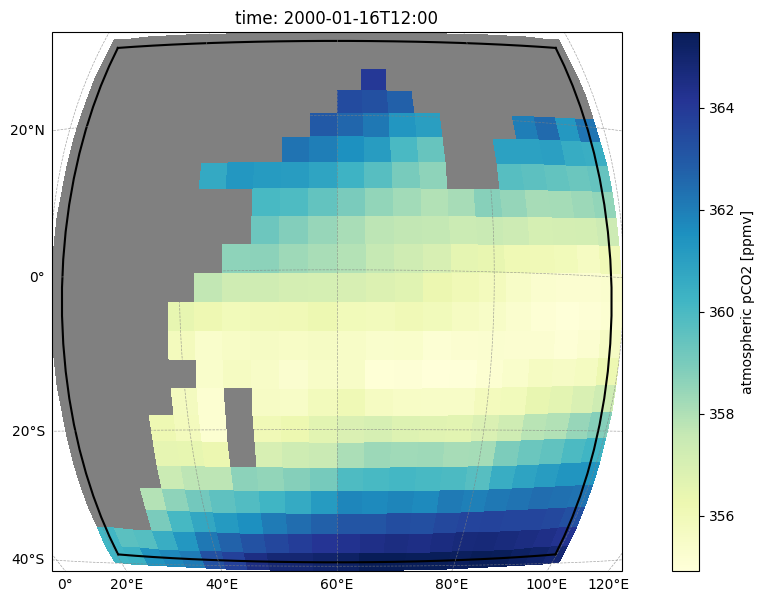

In [13]:
bgc_surface_forcing.plot("pco2_air", time=0)

## Boundary forcing

### Physics

In [14]:
%%time

boundary_forcing = rt.BoundaryForcing(
    grid=grid,
    boundaries={
        "south": True,
        "east": True,
        "north": True,
        "west": True, 
    },
    start_time=start_time,
    end_time=end_time,
    source={"name": "GLORYS", "path": glorys_path},
    type="physics",
    use_dask=True
)

boundary_forcing.save(input_data / "roms_bry.nc")

boundary_forcing.ds

2025-11-12 00:34:57 - INFO - Sea surface height will NOT be used to adjust depth coordinates.
2025-11-12 00:35:05 - INFO - Writing the following NetCDF files:
/Users/mclong/data/input_data/wio-toy/roms_bry_201201.nc
/Users/mclong/data/input_data/wio-toy/roms_bry_201202.nc


[########################################] | 100% Completed | 34.90 s
[########################################] | 100% Completed | 568.59 ms
CPU times: user 46.1 s, sys: 1min 55s, total: 2min 41s
Wall time: 43.8 s


<xarray.Dataset> Size: 479kB
Dimensions:     (bry_time: 32, s_rho: 10, xi_u: 21, xi_rho: 22, eta_rho: 22,
                 eta_v: 21)
Coordinates:
    abs_time    (bry_time) datetime64[ns] 256B 2012-01-01 ... 2012-02-01
  * bry_time    (bry_time) float64 256B 4.383e+03 4.384e+03 ... 4.414e+03
Dimensions without coordinates: s_rho, xi_u, xi_rho, eta_rho, eta_v
Data variables: (12/28)
    u_south     (bry_time, s_rho, xi_u) float32 27kB dask.array<chunksize=(1, 10, 21), meta=np.ndarray>
    v_south     (bry_time, s_rho, xi_rho) float32 28kB dask.array<chunksize=(1, 10, 22), meta=np.ndarray>
    temp_south  (bry_time, s_rho, xi_rho) float32 28kB dask.array<chunksize=(1, 10, 22), meta=np.ndarray>
    salt_south  (bry_time, s_rho, xi_rho) float32 28kB dask.array<chunksize=(1, 10, 22), meta=np.ndarray>
    zeta_south  (bry_time, xi_rho) float32 3kB dask.array<chunksize=(1, 22), meta=np.ndarray>
    ubar_south  (bry_time, xi_u) float32 3kB dask.array<chunksize=(1, 21), meta=np.ndarray>
    ...          ...
    v_west      (bry_time, s_rho, eta_v) float32 27kB dask.array<chunksize=(1, 10, 21), meta=np.ndarray>
    temp_west   (bry_time, s_rho, eta_rho) float32 28kB dask.array<chunksize=(1, 10, 22), meta=np.ndarray>
    salt_west   (bry_time, s_rho, eta_rho) float32 28kB dask.array<chunksize=(1, 10, 22), meta=np.ndarray>
    zeta_west   (bry_time, eta_rho) float32 3kB dask.array<chunksize=(1, 22), meta=np.ndarray>
    ubar_west   (bry_time, eta_rho) float32 3kB dask.array<chunksize=(1, 22), meta=np.ndarray>
    vbar_west   (bry_time, eta_v) float32 3kB dask.array<chunksize=(1, 21), meta=np.ndarray>
Attributes:
    title:                                ROMS boundary forcing file created ...
    roms_tools_version:                   3.1.3.dev13+g2830da646
    start_time:                           2012-01-01 00:00:00
    end_time:                             2012-02-01 00:00:00
    source:                               GLORYS
    model_reference_date:                 2000-01-01 00:00:00
    apply_2d_horizontal_fill:             False
    adjust_depth_for_sea_surface_height:  False
    theta_s:                              5.0
    theta_b:                              2.0
    hc:                                   300.0

[########################################] | 100% Completed | 426.57 ms


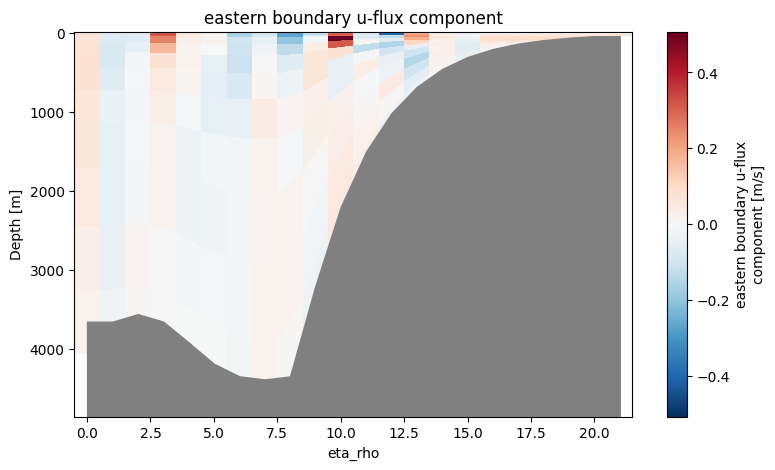

In [15]:
boundary_forcing.plot("u_east", time=0)

### BGC

In [16]:
%%time

bgc_boundary_forcing = rt.BoundaryForcing(
    grid=grid,
    boundaries={
        "south": True,
        "east": True,
        "north": True,
        "west": True,
    },
    start_time=start_time,
    end_time=end_time,
    source={"name": "UNIFIED", "path": bgc_forcing_path, "climatology": True},
    type="bgc",
    use_dask=True
)

bgc_boundary_forcing.save(input_data / "roms_bry_bgc.nc")

bgc_boundary_forcing.ds

2025-11-12 00:35:41 - INFO - Sea surface height will NOT be used to adjust depth coordinates.
2025-11-12 00:35:43 - INFO - Writing the following NetCDF files:
/Users/mclong/data/input_data/wio-toy/roms_bry_bgc_clim.nc


[########################################] | 100% Completed | 10.20 s
CPU times: user 9.27 s, sys: 6.68 s, total: 16 s
Wall time: 13.3 s


<xarray.Dataset> Size: 1MB
Dimensions:            (bry_time: 12, s_rho: 10, xi_rho: 22, eta_rho: 22)
Coordinates:
    month              (bry_time) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
    abs_time           (bry_time) datetime64[ns] 96B 2000-01-16T12:00:00 ... ...
  * bry_time           (bry_time) float64 96B 15.5 45.0 74.5 ... 319.0 349.5
Dimensions without coordinates: s_rho, xi_rho, eta_rho
Data variables: (12/128)
    PO4_south          (bry_time, s_rho, xi_rho) float32 11kB dask.array<chunksize=(2, 10, 22), meta=np.ndarray>
    NO3_south          (bry_time, s_rho, xi_rho) float32 11kB dask.array<chunksize=(2, 10, 22), meta=np.ndarray>
    SiO3_south         (bry_time, s_rho, xi_rho) float32 11kB dask.array<chunksize=(2, 10, 22), meta=np.ndarray>
    Fe_south           (bry_time, s_rho, xi_rho) float32 11kB dask.array<chunksize=(2, 10, 22), meta=np.ndarray>
    O2_south           (bry_time, s_rho, xi_rho) float32 11kB dask.array<chunksize=(2, 10, 22), meta=np.ndarray>
    DIC_south          (bry_time, s_rho, xi_rho) float32 11kB dask.array<chunksize=(2, 10, 22), meta=np.ndarray>
    ...                 ...
    diazFe_west        (bry_time, s_rho, eta_rho) float32 11kB dask.array<chunksize=(2, 10, 22), meta=np.ndarray>
    spCaCO3_west       (bry_time, s_rho, eta_rho) float32 11kB dask.array<chunksize=(2, 10, 22), meta=np.ndarray>
    zooC_west          (bry_time, s_rho, eta_rho) float32 11kB dask.array<chunksize=(2, 10, 22), meta=np.ndarray>
    Lig_west           (bry_time, s_rho, eta_rho) float32 11kB dask.array<chunksize=(2, 10, 22), meta=np.ndarray>
    DIC_ALT_CO2_west   (bry_time, s_rho, eta_rho) float32 11kB dask.array<chunksize=(2, 10, 22), meta=np.ndarray>
    ALK_ALT_CO2_west   (bry_time, s_rho, eta_rho) float32 11kB dask.array<chunksize=(2, 10, 22), meta=np.ndarray>
Attributes:
    title:                                ROMS boundary forcing file created ...
    roms_tools_version:                   3.1.3.dev13+g2830da646
    start_time:                           2012-01-01 00:00:00
    end_time:                             2012-02-01 00:00:00
    source:                               UNIFIED
    model_reference_date:                 2000-01-01 00:00:00
    apply_2d_horizontal_fill:             False
    adjust_depth_for_sea_surface_height:  False
    theta_s:                              5.0
    theta_b:                              2.0
    hc:                                   300.0
    climatology:                          True

[########################################] | 100% Completed | 111.48 ms


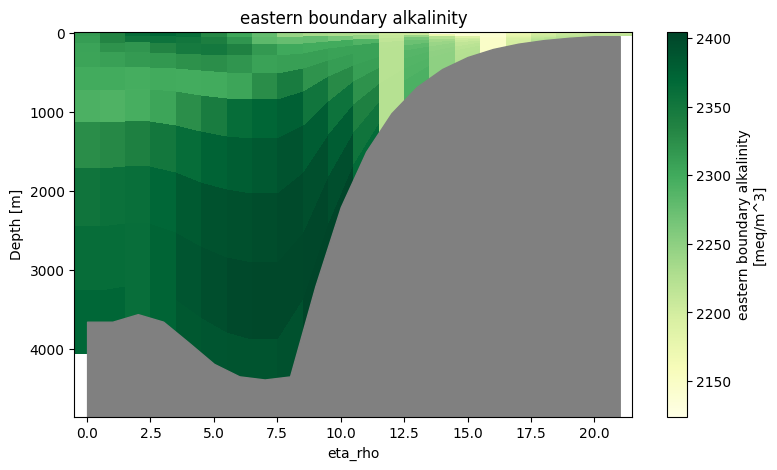

In [17]:
bgc_boundary_forcing.plot("ALK_east", time=0)

In [18]:
%%time

river_forcing = rt.RiverForcing(
    grid=grid,
    start_time=start_time,
    end_time=end_time,
    include_bgc=True
)

river_forcing.save(input_data / "roms_rivers.nc")

river_forcing.ds

2025-11-12 00:35:55 - INFO - No river indices provided. Identify all rivers within the ROMS domain and assign each of them to the nearest coastal point.
2025-11-12 00:35:55 - INFO - Compute climatology for river forcing.
2025-11-12 00:35:55 - INFO - Creating 14 synthetic river(s) to handle overlapping entries.
2025-11-12 00:35:55 - WARNING - NaNs detected in 'river_volume' and set to zero. This may indicate missing river data and affect model accuracy. 
2025-11-12 00:35:55 - INFO - Writing the following NetCDF files:
/Users/mclong/data/input_data/wio-toy/roms_rivers.nc


CPU times: user 483 ms, sys: 37.7 ms, total: 521 ms
Wall time: 531 ms


<xarray.Dataset> Size: 314kB
Dimensions:           (river_time: 12, nriver: 89, ntracers: 34, eta_rho: 22,
                       xi_rho: 22)
Coordinates:
    month             (river_time) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
    river_name        (nriver) object 712B 'Brahmaputra' ... 'overlap_14'
  * nriver            (nriver) int64 712B 1 2 3 4 5 6 7 ... 83 84 85 86 87 88 89
    abs_time          (river_time) datetime64[ns] 96B 2000-01-16 ... 2000-12-15
  * river_time        (river_time) float64 96B 15.0 45.0 74.0 ... 319.0 349.0
    tracer_name       (ntracers) <U11 1kB 'temp' 'salt' ... 'diazP' 'diazFe'
    tracer_unit       (ntracers) <U15 2kB 'degrees Celsius' 'PSU' ... 'mmol/m^3'
    tracer_long_name  (ntracers) <U43 6kB 'potential temperature' ... 'diazot...
Dimensions without coordinates: ntracers, eta_rho, xi_rho
Data variables:
    river_volume      (river_time, nriver) float64 9kB 0.0 0.0 ... 107.1
    river_tracer      (river_time, ntracers, nriver) float64 290kB 17.0 ... 1...
    river_index       (eta_rho, xi_rho) float32 2kB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    river_fraction    (eta_rho, xi_rho) float32 2kB 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    climatology:  True

2025-11-12 00:35:55 - WARNING - Only the first 20 rivers will be plotted (received 89).


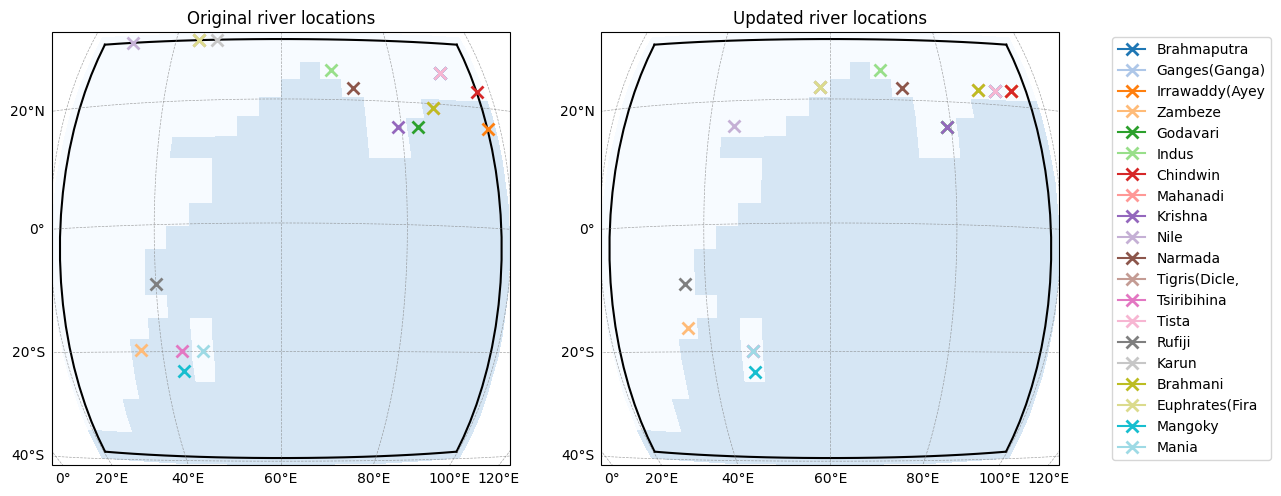

In [19]:
river_forcing.plot_locations()

2025-11-12 00:35:56 - WARNING - Only the first 20 rivers will be plotted (received 89).


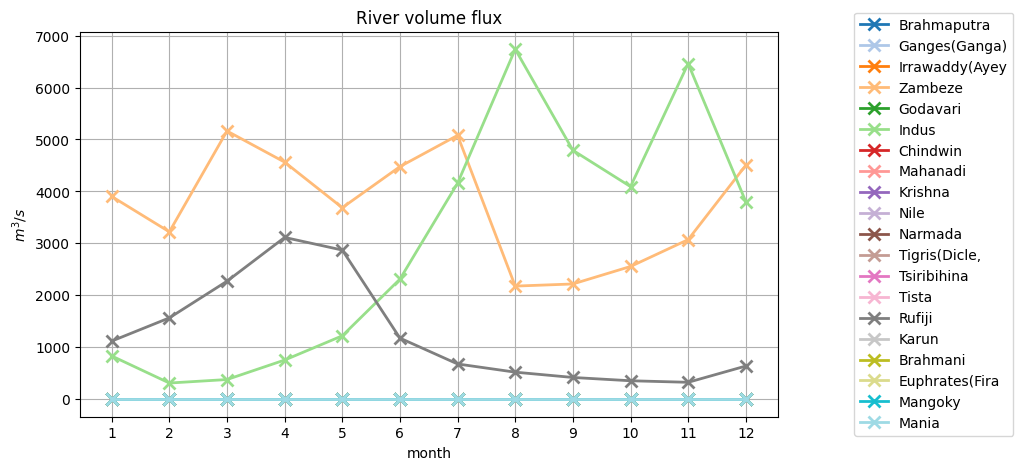

In [20]:
river_forcing.plot("river_volume")

In [21]:
release = rt.TracerPerturbation(
    name="OAE",
    lat=-4.04,  # degree N
    lon=39.7,  # degree E
    depth=0,  # m
    hsc=100000, # m
    vsc=50,  # m
    tracer_fluxes={"ALK": 2 * 10**6},  # meq/s
)

cdr_forcing = rt.CDRForcing(
    grid=grid,
    start_time=start_time, # simulation start time
    end_time=end_time, # simulation end time
    releases=[release]
)

cdr_forcing.save(input_data / "roms_cdr.nc")

2025-11-12 00:35:56 - INFO - Writing the following NetCDF files:
/Users/mclong/data/input_data/wio-toy/roms_cdr.nc


[PosixPath('/Users/mclong/data/input_data/wio-toy/roms_cdr.nc')]

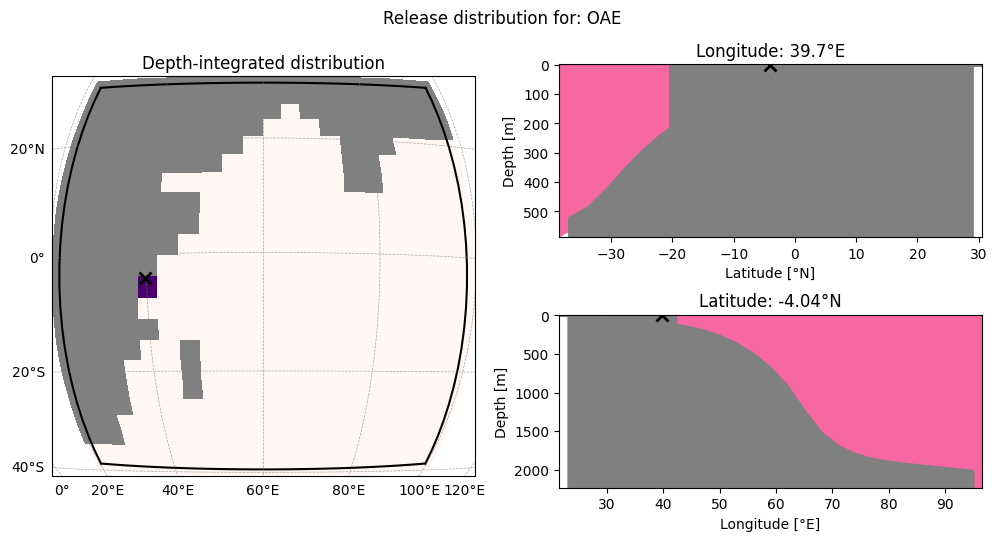

In [22]:
cdr_forcing.plot_distribution(release_name="OAE")

In [23]:
files = glob(str(input_data / "*.nc"))
rt.partition_netcdf(files, np_eta=2, np_xi=5, output_dir=input_data, include_coarse_dims=False)

[PosixPath('/Users/mclong/data/input_data/wio-toy/roms_grd.0.nc'),
 PosixPath('/Users/mclong/data/input_data/wio-toy/roms_grd.1.nc'),
 PosixPath('/Users/mclong/data/input_data/wio-toy/roms_grd.2.nc'),
 PosixPath('/Users/mclong/data/input_data/wio-toy/roms_grd.3.nc'),
 PosixPath('/Users/mclong/data/input_data/wio-toy/roms_grd.4.nc'),
 PosixPath('/Users/mclong/data/input_data/wio-toy/roms_grd.5.nc'),
 PosixPath('/Users/mclong/data/input_data/wio-toy/roms_grd.6.nc'),
 PosixPath('/Users/mclong/data/input_data/wio-toy/roms_grd.7.nc'),
 PosixPath('/Users/mclong/data/input_data/wio-toy/roms_grd.8.nc'),
 PosixPath('/Users/mclong/data/input_data/wio-toy/roms_grd.9.nc'),
 PosixPath('/Users/mclong/data/input_data/wio-toy/roms_ic.0.nc'),
 PosixPath('/Users/mclong/data/input_data/wio-toy/roms_ic.1.nc'),
 PosixPath('/Users/mclong/data/input_data/wio-toy/roms_ic.2.nc'),
 PosixPath('/Users/mclong/data/input_data/wio-toy/roms_ic.3.nc'),
 PosixPath('/Users/mclong/data/input_data/wio-toy/roms_ic.4.nc'),


In [24]:
# copy from config.model_config to new dir: config_root
# apply templating engine to replace vars
# maybe this should be done in 2
# modify files:
# roms.in 
# param.opt
# river_frc.opt
# cdr_frc.opt